Uploading the data into Colab space.

In [ ]:
iris <- read.csv("/content/Iris.csv")

Checking the contents of the csv file.

In [ ]:
iris_df <- iris[,2:5]
dim(iris_df)
head(iris_df)

[1] 150   4

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


Calculating WCSS(within cluster sum of squares) for different number  of clusters using kmeans clustering and  plotting them.

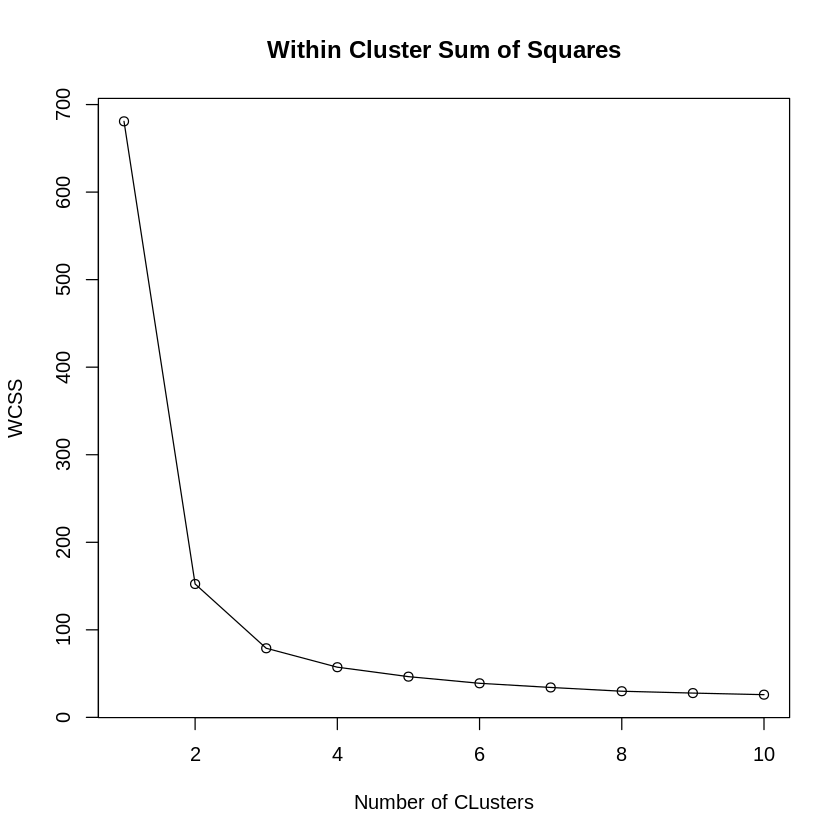

In [ ]:
wcss <- c()
for (i in 1:10)
{
  km.out=kmeans (iris_df,i,nstart =30)
  wcss <- append(wcss,km.out$tot.withinss)
}
i <- c(1:10)
wcss <- cbind(i,wcss)
plot(wcss,type = 'o',xlab = "Number of CLusters",ylab = "WCSS",main = "Within Cluster Sum of Squares")

Predicting using Kmeans clustering.

In [ ]:
k3.output =kmeans (iris_df,3,nstart =40)
k3.output

K-means clustering with 3 clusters of sizes 62, 38, 50

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      5.901613     2.748387      4.393548     1.433871
2      6.850000     3.073684      5.742105     2.071053
3      5.006000     3.418000      1.464000     0.244000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 39.82097 23.87947 15.24040
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

[1] 1

Assigning group name for the three clusters.

In [ ]:
setosa <- c()
versicolor <- c()
virginica <- c()
for(i in 1:150)
{
  if (k3.output$cluster[i]==3){setosa <- append(setosa,i)}
  else if(k3.output$cluster[i]==2){versicolor <- append(versicolor,i)}
  else if(k3.output$cluster[i]==1){virginica <- append(virginica,i)}
}

Visualizing the clusters using the first two features.

In [ ]:
library(ggplot2)

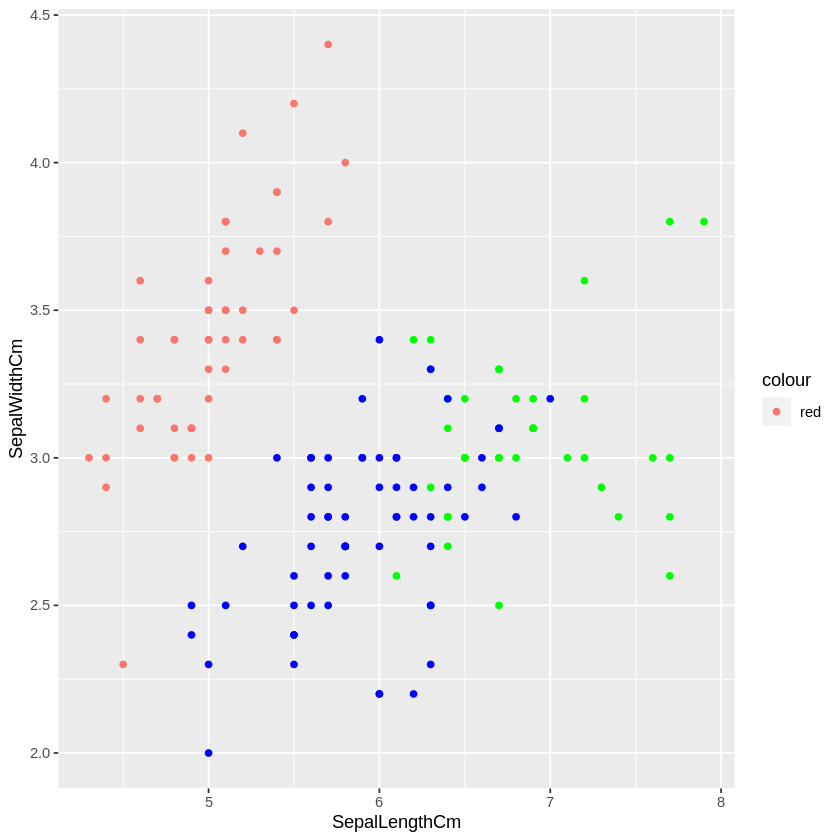

In [ ]:
first_scat = iris_df[setosa, 1:2]
sec_scat = iris_df[versicolor, 1:2]
third_scat = iris_df[virginica, 1:2]
ggplot(data = first_scat, aes(x = SepalLengthCm, y = SepalWidthCm, col = 'red')) + geom_point() + geom_point(data = sec_scat, col = 'green') + geom_point(data = third_scat, col = 'blue')